### Численное решение. Метод Эйлера

In [14]:
import numpy as np

# Определение матриц Паули
sigma_1 = np.array([[0, 1], [1, 0]])
sigma_2 = np.array([[0, -1j], [1j, 0]])
sigma_3 = np.array([[1, 0], [0, -1]])

# Определение функции правой части дифференциального уравнения
def f(omega, u):
    return 1j/2 * omega @ u

# Определение параметров
omega_1 = 1
omega_2 = 2
omega_3 = 3
omega = omega_1 * sigma_1 + omega_2 * sigma_2 + omega_3 * sigma_3
dt = 0.01  # шаг по времени
T = 10     # общее время интеграции
num_steps = int(T / dt)  # количество временных шагов

# Начальное значение матрицы u (единичная матрица)
u = np.eye(2, dtype=complex)

# Список для сохранения значений матрицы u в каждый момент времени
u_values = [u]

# Численное интегрирование методом Эйлера
for step in range(num_steps):
    u += dt * f(omega, u)
    u_values.append(u.copy())

# Преобразование списка значений матрицы u в numpy массив
u_values = np.array(u_values)

u_values

array([[[ 1.17897425-0.13653972j, -0.09102648-0.04551324j],
        [ 0.09102648-0.04551324j,  1.17897425+0.13653972j]],

       [[ 1.        +0.015j     ,  0.01      +0.005j     ],
        [-0.01      +0.005j     ,  1.        -0.015j     ]],

       [[ 0.99965   +0.03j      ,  0.02      +0.01j      ],
        [-0.02      +0.01j      ,  0.99965   -0.03j      ]],

       ...,

       [[ 1.17136965-0.17174092j, -0.11449395-0.05724697j],
        [ 0.11449395-0.05724697j,  1.17136965+0.17174092j]],

       [[ 1.17537694-0.15417038j, -0.10278025-0.05139013j],
        [ 0.10278025-0.05139013j,  1.17537694+0.15417038j]],

       [[ 1.17897425-0.13653972j, -0.09102648-0.04551324j],
        [ 0.09102648-0.04551324j,  1.17897425+0.13653972j]]])

### Численное решение. Метод Рунге-Кнутты

In [2]:
import numpy as np

# Определение матриц Паули
sigma_1 = np.array([[0, 1], [1, 0]])
sigma_2 = np.array([[0, -1j], [1j, 0]])
sigma_3 = np.array([[1, 0], [0, -1]])

# Определение функции правой части дифференциального уравнения
def f(omega, u):
    return 1j/2 * omega @ u

# Определение метода Рунге-Кутты 4-го порядка для численного интегрирования
def runge_kutta(omega, u, dt, num_steps):
    u_values = [u]  # Список для хранения значений матрицы u на каждом временном шаге

    for _ in range(num_steps):
        k1 = f(omega, u)
        k2 = f(omega, u + dt/2 * k1)
        k3 = f(omega, u + dt/2 * k2)
        k4 = f(omega, u + dt * k3)
        
        u += dt/6 * (k1 + 2*k2 + 2*k3 + k4)
        u_values.append(u.copy())

    return u_values

# Определение параметров
omega_1 = 1
omega_2 = 2
omega_3 = 3
omega = omega_1 * sigma_1 + omega_2 * sigma_2 + omega_3 * sigma_3
dt = 0.01  # шаг по времени
T = 10     # общее время интеграции
num_steps = int(T / dt)  # количество временных шагов

# Начальное значение матрицы u (единичная матрица)
u_initial = np.eye(2, dtype=complex)

# Получение значений матрицы u в каждый момент времени
u_values = runge_kutta(omega, u_initial, dt, num_steps)

u_values[-1]

array([[ 0.99003812-0.11289082j, -0.07526055-0.03763027j],
       [ 0.07526055-0.03763027j,  0.99003812+0.11289082j]])

### Ошибка апроксимации

In [2]:
import numpy as np

# Определение матриц Паули
sigma_1 = np.array([[0, 1], [1, 0]])
sigma_2 = np.array([[0, -1j], [1j, 0]])
sigma_3 = np.array([[1, 0], [0, -1]])

# Определение функции правой части дифференциального уравнения
def f(omega, u):
    return 1j/2 * omega @ u

# Определение параметров
omega_1 = 1
omega_2 = 2
omega_3 = 3
omega = omega_1 * sigma_1 + omega_2 * sigma_2 + omega_3 * sigma_3
T = 10     # общее время интеграции
dt_values = [0.01, 0.005, 0.001, 0.0001, 0.00001]  # значения шага по времени
u_exact = np.eye(2, dtype=complex)  # точное решение (в данном случае начальное)

# Численное интегрирование методом Эйлера для разных значений dt
errors = []
for dt in dt_values:
    num_steps = int(T / dt)  # количество временных шагов

    # Начальное значение матрицы u (единичная матрица)
    u = np.eye(2, dtype=complex)

    # Численное интегрирование методом Эйлера
    for step in range(num_steps):
        u += dt * f(omega, u)

    # Оценка ошибки аппроксимации (норма разности между численным и точным решением)
    error = np.linalg.norm(u - u_exact)
    errors.append(error)

# Вывод ошибок аппроксимации для каждого значения dt
for i, dt in enumerate(dt_values):
    print(f"dt = {dt}, Ошибка аппроксимации = {errors[i]}")


dt = 0.01, Ошибка аппроксимации = 0.34937702886456606
dt = 0.005, Ошибка аппроксимации = 0.24606703565430976
dt = 0.001, Ошибка аппроксимации = 0.20294536973196572
dt = 0.0001, Ошибка аппроксимации = 0.19980883652252224
dt = 1e-05, Ошибка аппроксимации = 0.1996624488884634


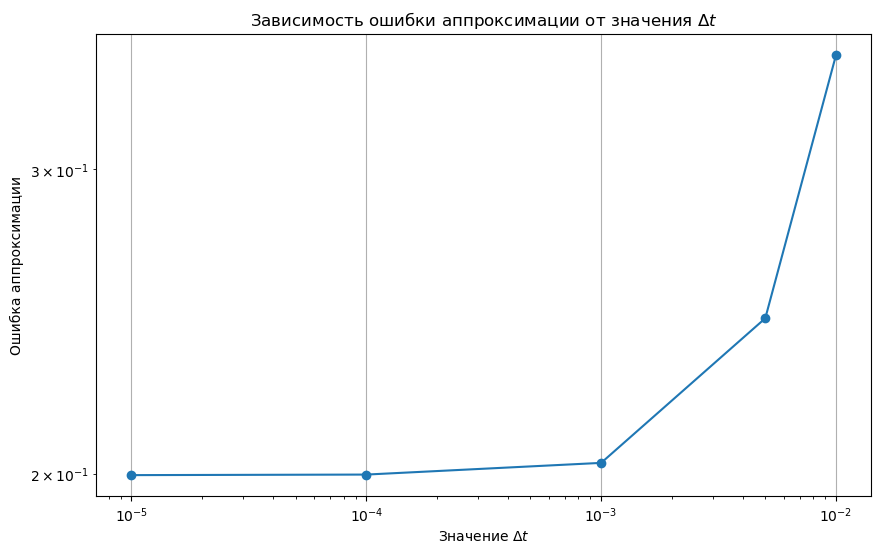

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dt_values, errors, marker='o', linestyle='-')
plt.xscale('log')  # Логарифмическая шкала по оси x
plt.yscale('log')  # Логарифмическая шкала по оси y
plt.title('Зависимость ошибки аппроксимации от значения $\\Delta t$')
plt.xlabel('Значение $\\Delta t$')
plt.ylabel('Ошибка аппроксимации')
plt.grid(True)
plt.show()

# Пайплайн

In [1]:
import math
import torch
import metrics
import ruptures
import ordpy as op
import numpy as np
import pandas as pd
from klcpd import KL_CPD
import scipy.stats as st
import colorednoise as cn
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from collections import OrderedDict
from models import binary_model
from tensorflow.keras.layers import LSTM
from catboost import CatBoostClassifier
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler
from ruptures.metrics import randindex, precision_recall
from data_generation import Binary_Telegraph_Process as BTP
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import balanced_accuracy_score, f1_score, auc, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
class synth_cpd_pipeline(object):
    def __init__(self, method='log-return', sample_len=1000, n_epochs=100):
        
        alpha1 = 1
        alpha2 = 2
        alpha3 = 3
        alpha4 = 4.5
        alpha5 = 3 * math.pi    
    
        
        self.data   = {fr'Белый, $\alpha = {alpha1}$':[], fr'Белый, $\alpha = {alpha2}$':[], fr'Белый, $\alpha = {alpha3}$':[], fr'Белый, $\alpha = {alpha4}$':[], fr'Белый, $\alpha = {alpha5}$':[],
                       fr'Розовый, $\alpha = {alpha1}$':[], fr'Розовый, $\alpha = {alpha2}$':[], fr'Розовый, $\alpha = {alpha3}$':[], fr'Розовый, $\alpha = {alpha4}$':[], fr'Розовый, $\alpha = {alpha5}$':[],
                       fr'Красный, $\alpha = {alpha1}$':[], fr'Красный, $\alpha = {alpha2}$':[], fr'Красный, $\alpha = {alpha3}$':[], fr'Красный, $\alpha = {alpha4}$':[], fr'Красный, $\alpha = {alpha5}$':[],
                       fr'Синий, $\alpha = {alpha1}$':[], fr'Синий, $\alpha = {alpha2}$':[], fr'Синий, $\alpha = {alpha3}$':[], fr'Синий, $\alpha = {alpha4}$':[], fr'Синий, $\alpha = {alpha5}$':[], 
                       fr'Фиолетовый, $\alpha = {alpha1}$':[], fr'Фиолетовый, $\alpha = {alpha2}$':[], fr'Фиолетовый, $\alpha = {alpha3}$':[], fr'Фиолетовый, $\alpha = {alpha4}$':[], fr'Фиолетовый, $\alpha = {alpha5}$':[]}
        self.labels = []
        self.lr     = []
        self.noise  = [fr'Белый, $\alpha = {alpha1}$', fr'Розовый, $\alpha = {alpha1}$', fr'Красный, $\alpha = {alpha1}$', fr'Синий, $\alpha = {alpha1}$', fr'Фиолетовый, $\alpha = {alpha1}$',
                       fr'Белый, $\alpha = {alpha2}$', fr'Розовый, $\alpha = {alpha2}$', fr'Красный, $\alpha = {alpha2}$', fr'Синий, $\alpha = {alpha2}$', fr'Фиолетовый, $\alpha = {alpha2}$',
                       fr'Белый, $\alpha = {alpha3}$', fr'Розовый, $\alpha = {alpha3}$', fr'Красный, $\alpha = {alpha3}$', fr'Синий, $\alpha = {alpha3}$', fr'Фиолетовый, $\alpha = {alpha3}$',
                       fr'Белый, $\alpha = {alpha4}$', fr'Розовый, $\alpha = {alpha4}$', fr'Красный, $\alpha = {alpha4}$', fr'Синий, $\alpha = {alpha4}$', fr'Фиолетовый, $\alpha = {alpha4}$',
                       fr'Белый, $\alpha = {alpha5}$', fr'Розовый, $\alpha = {alpha5}$', fr'Красный, $\alpha = {alpha5}$', fr'Синий, $\alpha = {alpha5}$', fr'Фиолетовый, $\alpha = {alpha5}$']
        
        self.method = method
        self.sample_len = sample_len
        self.random_seeds = [1, 3, 5, 7, 11, 15, 17, 19, 23, 73]
        self.horizon = [1, 2, 5, 10, 25]#, 10, 100]
        self.n_epochs = n_epochs
    
    
    def init_data(self):
        alpha1 = 1
        alpha2 = 2
        alpha3 = 3
        alpha4 = 4.5
        alpha5 = 3 * math.pi
    
        for seed in self.random_seeds:
            # Normal
            self.data[fr'Белый, $\alpha = {alpha1}$'].append(BTP(self.sample_len, np.random.normal, 0, RANDOM_SEED=seed, alpha=alpha1))
            self.data[fr'Белый, $\alpha = {alpha2}$'].append(BTP(self.sample_len, np.random.normal, 0, RANDOM_SEED=seed, alpha=alpha2))
            self.data[fr'Белый, $\alpha = {alpha3}$'].append(BTP(self.sample_len, np.random.normal, 0, RANDOM_SEED=seed, alpha=alpha3))
            self.data[fr'Белый, $\alpha = {alpha4}$'].append(BTP(self.sample_len, np.random.normal, 0, RANDOM_SEED=seed, alpha=alpha4))
            self.data[fr'Белый, $\alpha = {alpha5}$'].append(BTP(self.sample_len, np.random.normal, 0, RANDOM_SEED=seed, alpha=alpha5))
            # Pink
            self.data[fr'Розовый, $\alpha = {alpha1}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, 1, RANDOM_SEED=seed, alpha=alpha1))
            self.data[fr'Розовый, $\alpha = {alpha2}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, 1, RANDOM_SEED=seed, alpha=alpha2))
            self.data[fr'Розовый, $\alpha = {alpha3}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, 1, RANDOM_SEED=seed, alpha=alpha3))
            self.data[fr'Розовый, $\alpha = {alpha4}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, 1, RANDOM_SEED=seed, alpha=alpha4))
            self.data[fr'Розовый, $\alpha = {alpha5}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, 1, RANDOM_SEED=seed, alpha=alpha5))
            # Red
            self.data[fr'Красный, $\alpha = {alpha1}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, 2, RANDOM_SEED=seed, alpha=alpha1))
            self.data[fr'Красный, $\alpha = {alpha2}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, 2, RANDOM_SEED=seed, alpha=alpha2))
            self.data[fr'Красный, $\alpha = {alpha3}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, 2, RANDOM_SEED=seed, alpha=alpha3))
            self.data[fr'Красный, $\alpha = {alpha4}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, 2, RANDOM_SEED=seed, alpha=alpha4))
            self.data[fr'Красный, $\alpha = {alpha5}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, 2, RANDOM_SEED=seed, alpha=alpha5))
            # Blue
            self.data[fr'Синий, $\alpha = {alpha1}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, -1, RANDOM_SEED=seed, alpha=alpha1))
            self.data[fr'Синий, $\alpha = {alpha2}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, -1, RANDOM_SEED=seed, alpha=alpha2))
            self.data[fr'Синий, $\alpha = {alpha3}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, -1, RANDOM_SEED=seed, alpha=alpha3))
            self.data[fr'Синий, $\alpha = {alpha4}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, -1, RANDOM_SEED=seed, alpha=alpha4))
            self.data[fr'Синий, $\alpha = {alpha5}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, -1, RANDOM_SEED=seed, alpha=alpha5))
            # Violet
            self.data[fr'Фиолетовый, $\alpha = {alpha1}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, -2, RANDOM_SEED=seed, alpha=alpha1))
            self.data[fr'Фиолетовый, $\alpha = {alpha2}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, -2, RANDOM_SEED=seed, alpha=alpha2))
            self.data[fr'Фиолетовый, $\alpha = {alpha3}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, -2, RANDOM_SEED=seed, alpha=alpha3))
            self.data[fr'Фиолетовый, $\alpha = {alpha4}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, -2, RANDOM_SEED=seed, alpha=alpha4))
            self.data[fr'Фиолетовый, $\alpha = {alpha5}$'].append(BTP(self.sample_len, cn.powerlaw_psd_gaussian, -2, RANDOM_SEED=seed, alpha=alpha5))

    
    def autoregression_matrix(self, X, periods=1, fill_value=0):
        shifted_x = [pd.DataFrame(X).shift(periods=i, fill_value=fill_value).values for i in range(periods)]
        return np.hstack(tuple(shifted_x))
    
    
    def euler(self, complex_num):
        modulus = abs(complex_num)
        argument = cmath.phase(complex_num)

        return modulus * cmath.exp(1j * argument)
    
    
    def single_cpd_predict(self, noise):

        qms = []
        f1, acc, pr = dict.fromkeys(self.horizon), dict.fromkeys(self.horizon), dict.fromkeys(self.horizon)

        for btp in tqdm(self.data[noise], desc=noise):
            
            X = np.array(btp.get_data())
            L = btp.labels()#['levels'].values
            y = np.array(btp.labels_)
            # y[y > 0] = 1
    
            if self.method == 'lstm':
                lstm = binary_model(X.astype(np.float32), 0.7, 10, model='lstm', n_epochs=self.n_epochs)
                lstm.model_fit(verbose=0)

            single_qms = []
            
            for h in self.horizon:
    
                if self.method == 'boost':
    
                    X_auto = self.autoregression_matrix(X, periods=h)
                    
                    X_train, X_test, y_train, y_test = tts(X_auto, y, test_size=0.5, shuffle=True, stratify=y)
                    clf = CatBoostClassifier(verbose=0)
                    clf.fit(X_train, y_train)
                    y_pred = clf.predict(X_test)
                    y_true = y_test
    
                elif self.method == 'lstm':
    
                    y_pred = lstm.labels(lstm.model_predict(h))['MARKS'].tolist()
                    y_true = y
                
                if len(y_true) > len(y_pred):
                    y_true = y_true[abs(len(y_true)-len(y_pred)):]
                else:
                    y_pred = y_pred[abs(len(y_true)-len(y_pred)):]
                
                f1_ = f1_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))
                acc_ = balanced_accuracy_score(y_true, y_pred)
                precision, recall, thr = precision_recall_curve(y_true, y_pred)
                pr_ = auc(recall, precision)

                single_qms.append([f1_, acc_, pr_])
        
            qms.append(single_qms)
        
        mu = np.mean(qms, axis=0)
        er = np.std(qms, axis=0) / np.sqrt(len(qms))

        print(mu)
        
        for h_i, h in enumerate(self.horizon):
            f1[h] = "%.3f ± %.3f" % (mu[h_i][0], er[h_i][0])
            acc[h] = "%.3f ± %.3f" % (mu[h_i][1], er[h_i][1])
            pr[h] = "%.3f ± %.3f" % (mu[h_i][2], er[h_i][2])
            
        return f1, acc, pr
    
    
    def cpd_predict(self):
        f1, acc, pr = dict.fromkeys(self.noise), dict.fromkeys(self.noise), dict.fromkeys(self.noise)

        if len(self.lr) == 0:
            self.init_data()
        
        for noise in tqdm(self.data.keys(), leave=True, position=0):
            if (self.method == 'boost') and (noise == fr'Синий, $\alpha = 1$' or noise == fr'Фиолетовый, $\alpha = 1$'):
                continue
            f1[noise], acc[noise], pr[noise] = self.single_cpd_predict(noise)
        
        return pd.DataFrame(f1).T, pd.DataFrame(acc).T, pd.DataFrame(pr).T

    
    def plot_delta_t(self, n_bins=20):

        self.init_data()

        fig, ax = plt.subplots(ncols=5, nrows=5, figsize=(20, 10))

        c = 0
        
        for i, noise in enumerate(self.noise):
    
            labels = np.array([])
            for btp in self.data[noise]:
                X = np.array(btp.get_data())
                L = btp.labels()                
                y = np.array(btp.labels_)
                label = np.arange(len(y))[y > 0]
                labels = np.concatenate((labels, np.abs(label[1:]-label[:-1])))
    
            labels = np.array(labels).squeeze()

            # print(noise, )
            c += len(labels)/10_000

            ax[i//5, i%5].set_yscale('log')
            ax[i//5, i%5].hist(labels, n_bins)
            if i%5 == 0:
                ax[i//5, i%5].set_ylabel('Частота', fontsize=16, weight='bold')
            if i//5 == 2:
                ax[i//5, i%5].set_xlabel(r'$\Delta$ t', fontsize=16, weight='bold')
            ax[i//5, i%5].set_title(noise, fontsize=16)
            ax[i//5, i%5].tick_params(labelsize=16)

        # print(c / 15)
        
        fig.suptitle('Частоты расстоянии между точками разладки', fontsize=20, weight='bold')
        plt.tight_layout()
        plt.show()
            
        fig.savefig('histogram_changes.jpeg', format='jpeg', dpi=200)

### CatBoost

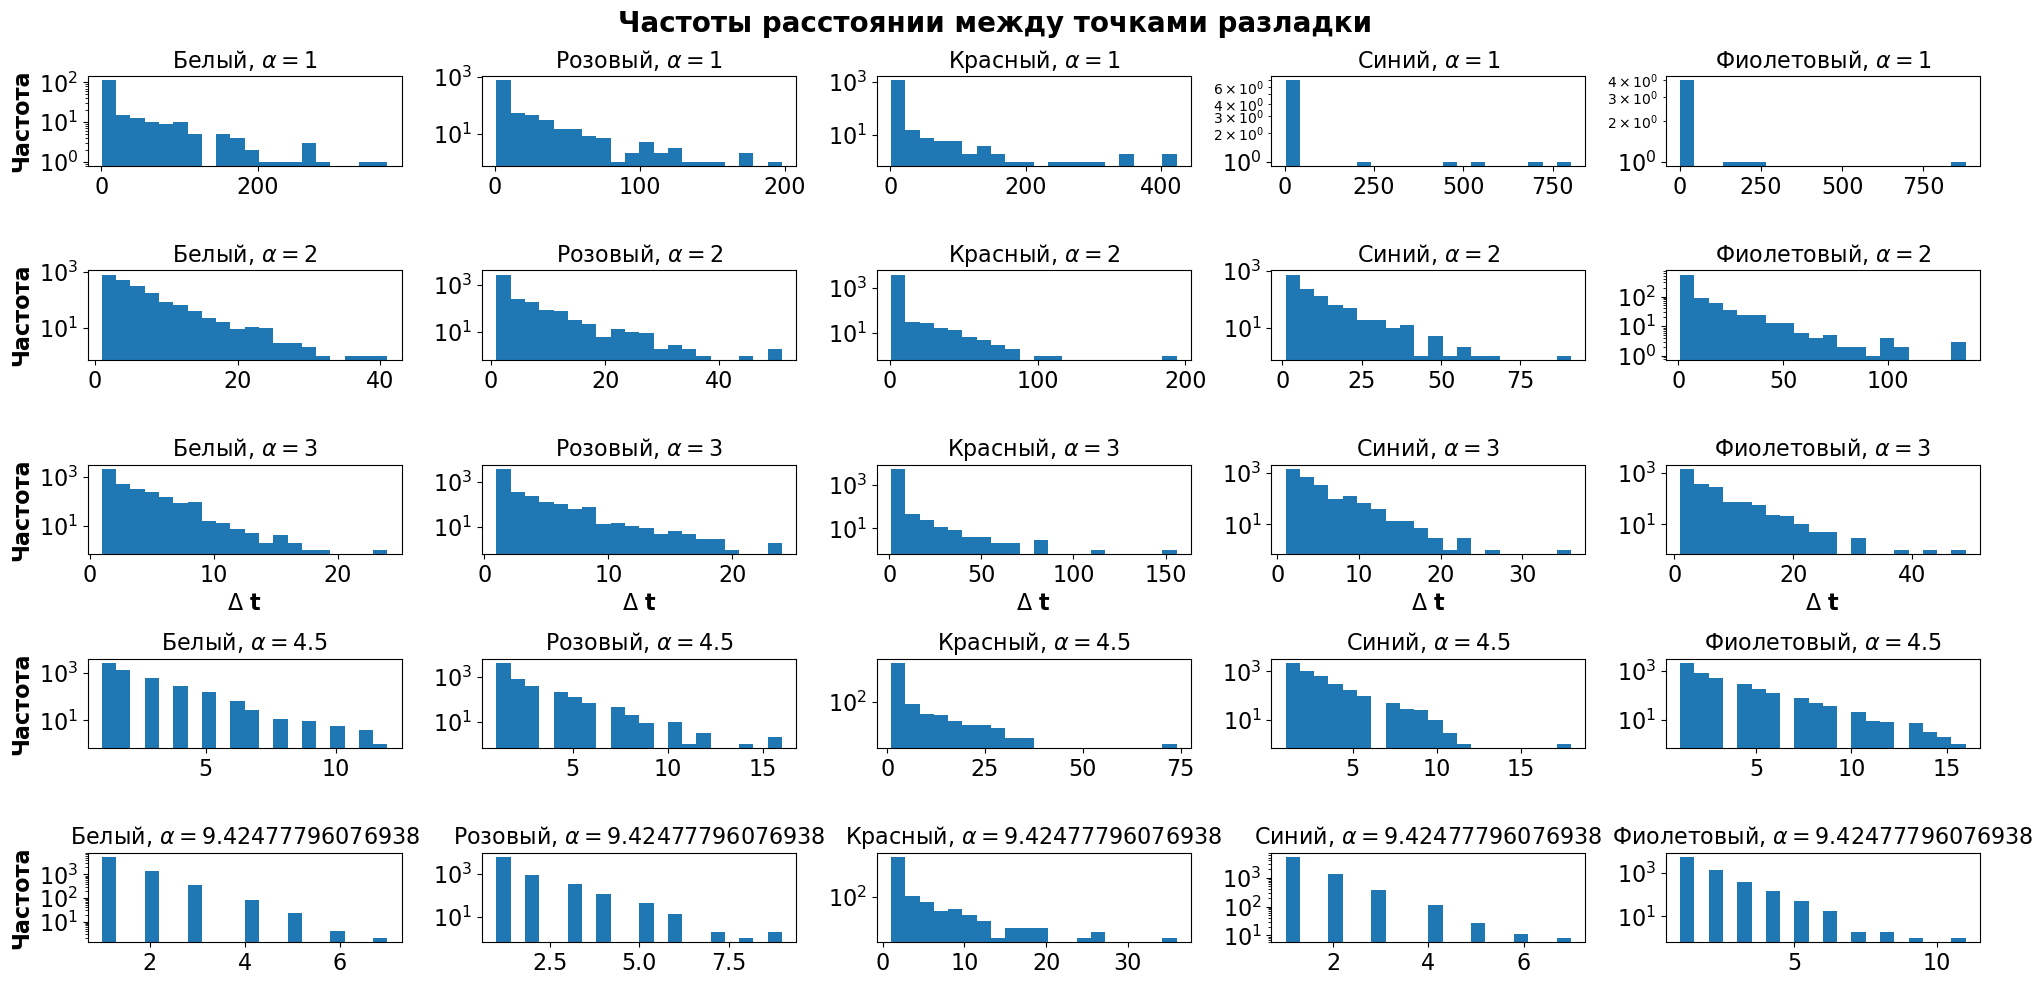

In [3]:
cpd = synth_cpd_pipeline(method='boost')
cpd.plot_delta_t()

In [4]:
f1_boost, acc_boost, pr_boost = cpd.cpd_predict()

  0%|          | 0/25 [00:00<?, ?it/s]

Белый, $\alpha = 1$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.98505041 0.49979633 0.41067864]
 [0.98245398 0.50738535 0.40150468]
 [0.9799213  0.52900783 0.45939729]
 [0.98039565 0.50343819 0.364425  ]
 [0.98920156 0.5        0.51067864]]


Белый, $\alpha = 2$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.78582337 0.49990176 0.40452188]
 [0.72269506 0.53385032 0.43050035]
 [0.72711826 0.53870324 0.52448742]
 [0.70140549 0.51031101 0.40125716]
 [0.69382873 0.50230895 0.25818982]]


Белый, $\alpha = 3$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.52421198 0.49815052 0.36858813]
 [0.64861233 0.6027115  0.62379856]
 [0.64752735 0.60153739 0.61693288]
 [0.58577999 0.54721362 0.51811953]
 [0.546138   0.51236698 0.42738439]]


Белый, $\alpha = 4.5$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.49660705 0.49838048 0.65099399]
 [0.66761534 0.66806555 0.76131064]
 [0.63816398 0.63758035 0.74304858]
 [0.57447873 0.57429761 0.69746973]
 [0.51577565 0.51569153 0.65739781]]


Белый, $\alpha = 9.42477796076938$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.72473308 0.50068883 0.87158231]
 [0.66537434 0.52536085 0.87473734]
 [0.64688908 0.50717558 0.87190915]
 [0.63902075 0.49976044 0.87006644]
 [0.64068771 0.50143666 0.87063923]]


Розовый, $\alpha = 1$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.89124246 0.50728378 0.30297024]
 [0.90303721 0.50780198 0.37087041]
 [0.8787027  0.50578617 0.26972198]
 [0.87294253 0.5138112  0.22085685]
 [0.86816085 0.51446725 0.2006842 ]]


Розовый, $\alpha = 2$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.62812889 0.5673521  0.51394032]
 [0.63370827 0.57349849 0.53787659]
 [0.64248508 0.58036762 0.54620806]
 [0.64895417 0.58730991 0.56432751]
 [0.66467163 0.60314888 0.5773951 ]]


Розовый, $\alpha = 3$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.58642772 0.58746339 0.67713457]
 [0.5930493  0.59382478 0.68422195]
 [0.63054361 0.63082027 0.7167549 ]
 [0.62631711 0.62691595 0.71237258]
 [0.63524761 0.63538942 0.71735485]]


Розовый, $\alpha = 4.5$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.5926524  0.56413349 0.79362868]
 [0.60696176 0.57774465 0.79834939]
 [0.61471816 0.58736475 0.80261272]
 [0.62187637 0.59161723 0.80204196]
 [0.62682469 0.59667201 0.8015975 ]]


Розовый, $\alpha = 9.42477796076938$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.72173018 0.50766805 0.88964818]
 [0.70576512 0.51184758 0.89031869]
 [0.69399648 0.50931199 0.8894257 ]
 [0.69648372 0.51214557 0.89000372]
 [0.70865504 0.51504258 0.88941453]]


Красный, $\alpha = 1$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.86436901 0.577685   0.38616486]
 [0.85884729 0.57898724 0.35542444]
 [0.84313234 0.55649704 0.27324552]
 [0.84786221 0.57162062 0.31631699]
 [0.84872749 0.5760006  0.32077031]]


Красный, $\alpha = 2$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.76691282 0.75761558 0.77731557]
 [0.76896326 0.76079695 0.77905441]
 [0.76902954 0.75907229 0.77943806]
 [0.77618428 0.76802737 0.78584606]
 [0.77976259 0.77128313 0.78925768]]


Красный, $\alpha = 3$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.79417654 0.77724327 0.87601215]
 [0.79480045 0.77848686 0.87618813]
 [0.79841469 0.78178355 0.87794421]
 [0.80911991 0.79057191 0.88378048]
 [0.80643646 0.79226855 0.88292783]]


Красный, $\alpha = 4.5$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.82918995 0.77950127 0.91851047]
 [0.83916331 0.79449288 0.92367711]
 [0.84343453 0.79718536 0.92495465]
 [0.85423398 0.81102182 0.92992442]
 [0.8533795  0.81422512 0.93085405]]


Красный, $\alpha = 9.42477796076938$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.88597587 0.69276765 0.9573175 ]
 [0.89247298 0.70697871 0.95960469]
 [0.89826109 0.71779689 0.96114162]
 [0.89567009 0.70877679 0.96039854]
 [0.90185016 0.73053446 0.96328996]]


Синий, $\alpha = 2$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.82040595 0.51459968 0.36883521]
 [0.85668902 0.59969012 0.53397386]
 [0.84921402 0.57940999 0.58332925]
 [0.83725024 0.53433178 0.47985558]
 [0.87788013 0.50701366 0.48845636]]


Синий, $\alpha = 3$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.63568618 0.50394542 0.37830595]
 [0.7829493  0.69810463 0.70345372]
 [0.75952237 0.66220564 0.70469809]
 [0.69014502 0.58709285 0.62611936]
 [0.63440394 0.52501475 0.50764251]]


Синий, $\alpha = 4.5$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.50881471 0.51149075 0.57297867]
 [0.77760631 0.7743513  0.82358196]
 [0.75897904 0.75558338 0.81131348]
 [0.68344561 0.68102629 0.74264517]
 [0.59165443 0.59057184 0.65808805]]


Синий, $\alpha = 9.42477796076938$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.71146432 0.50116518 0.86409979]
 [0.83883386 0.77483336 0.92545599]
 [0.76517776 0.65446554 0.89516977]
 [0.67918414 0.55410749 0.87318302]
 [0.63164058 0.51008438 0.86549757]]


Фиолетовый, $\alpha = 2$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.91045902 0.60681624 0.51959086]
 [0.93817907 0.71219174 0.67363702]
 [0.93286216 0.68973707 0.65906529]
 [0.92286999 0.64432124 0.63251155]
 [0.90636084 0.58042069 0.56169977]]


Фиолетовый, $\alpha = 3$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.698964   0.53136999 0.45159509]
 [0.83527003 0.72109868 0.72383929]
 [0.79635285 0.66049293 0.68515192]
 [0.74882458 0.5982372  0.6232232 ]
 [0.70691457 0.54064137 0.55476278]]


Фиолетовый, $\alpha = 4.5$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.55380037 0.54941427 0.57507636]
 [0.81576747 0.80611858 0.84483946]
 [0.7971216  0.78619838 0.83285658]
 [0.74474715 0.73348535 0.78549065]
 [0.66615692 0.65747365 0.70439871]]


Фиолетовый, $\alpha = 9.42477796076938$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.63528397 0.50550041 0.85450206]
 [0.86523237 0.83468914 0.9398879 ]
 [0.82741587 0.76038113 0.91669879]
 [0.75123282 0.65030624 0.88795357]
 [0.65241667 0.54268415 0.86465331]]


In [5]:
f1_boost, acc_boost, pr_boost

(                                                    1              2   \
 Белый, $\alpha = 1$                      0.985 ± 0.002  0.982 ± 0.003   
 Розовый, $\alpha = 1$                    0.891 ± 0.010  0.903 ± 0.009   
 Красный, $\alpha = 1$                    0.864 ± 0.007  0.859 ± 0.006   
 Синий, $\alpha = 1$                               None           None   
 Фиолетовый, $\alpha = 1$                          None           None   
 Белый, $\alpha = 2$                      0.786 ± 0.021  0.723 ± 0.004   
 Розовый, $\alpha = 2$                    0.628 ± 0.008  0.634 ± 0.008   
 Красный, $\alpha = 2$                    0.767 ± 0.012  0.769 ± 0.010   
 Синий, $\alpha = 2$                      0.820 ± 0.006  0.857 ± 0.004   
 Фиолетовый, $\alpha = 2$                 0.910 ± 0.005  0.938 ± 0.003   
 Белый, $\alpha = 3$                      0.524 ± 0.004  0.649 ± 0.006   
 Розовый, $\alpha = 3$                    0.586 ± 0.009  0.593 ± 0.008   
 Красный, $\alpha = 3$                

In [7]:
f1_boost.to_csv('f1_boost.csv')
acc_boost.to_csv('acc_boost.csv')
pr_boost.to_csv('pr_boost.csv')

### LSTM

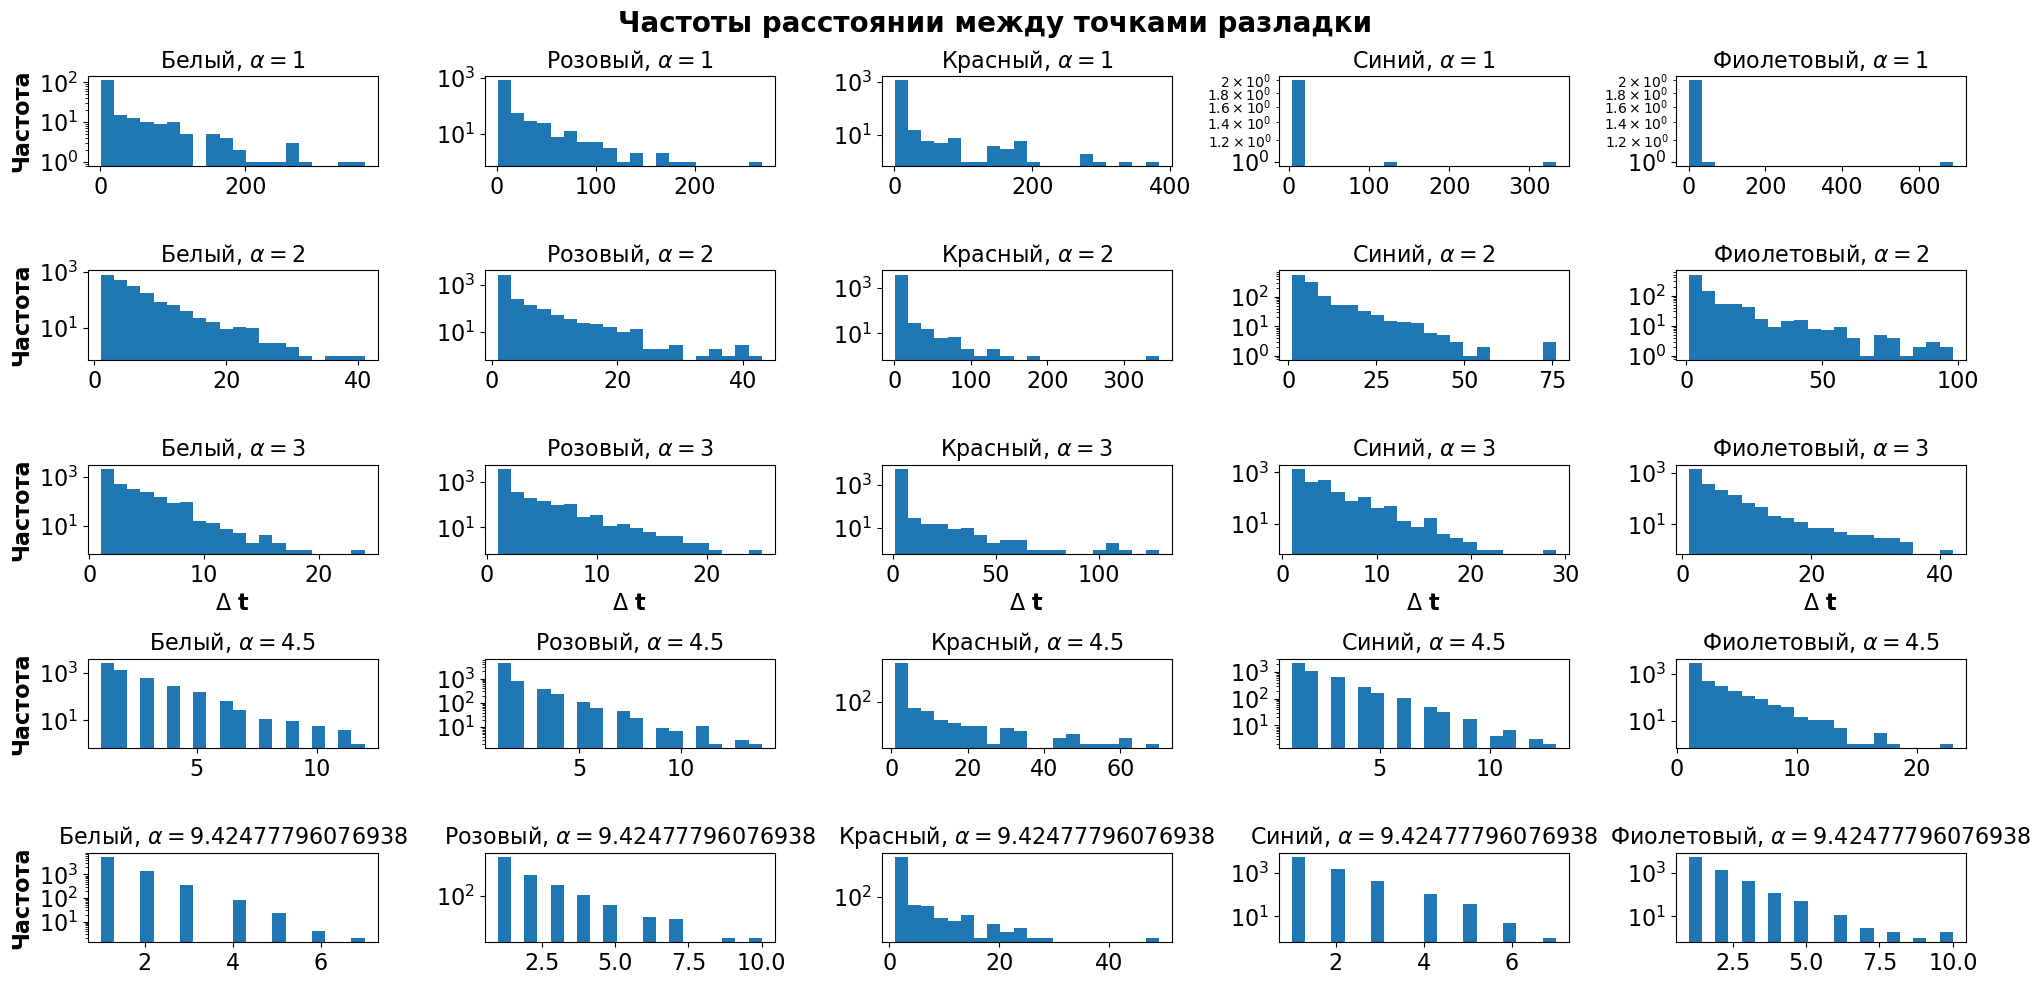

In [8]:
cpd = synth_cpd_pipeline(method='lstm')
cpd.plot_delta_t()

In [9]:
f1_lstm, acc_lstm, pr_lstm = cpd.cpd_predict()

  0%|          | 0/25 [00:00<?, ?it/s]

Белый, $\alpha = 1$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.97097566 0.50793211 0.14291667]
 [0.9708056  0.5077597  0.14291667]
 [0.96983592 0.49684485 0.10983333]
 [0.96966529 0.49667185 0.10983333]
 [0.97051015 0.49752744 0.10983333]]


Белый, $\alpha = 2$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.68040079 0.49731268 0.19703077]
 [0.68100041 0.4979609  0.19610339]
 [0.67966784 0.49656106 0.18341996]
 [0.68126164 0.49830481 0.19448881]
 [0.68256464 0.50079702 0.18621008]]


Белый, $\alpha = 3$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.51815805 0.49934966 0.37770137]
 [0.51596197 0.49707903 0.36346888]
 [0.51568343 0.49804553 0.36960239]
 [0.51690019 0.50012342 0.36925635]
 [0.51218479 0.49697638 0.33945783]]


Белый, $\alpha = 4.5$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.35935456 0.4999155  0.49560872]
 [0.35770124 0.49992042 0.51310929]
 [0.35264307 0.499051   0.49506322]
 [0.3458281  0.49747099 0.4762978 ]
 [0.33515254 0.49566048 0.44657231]]


Белый, $\alpha = 9.42477796076938$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.16249083 0.5056206  0.74470111]
 [0.15628427 0.50295908 0.74902649]
 [0.14854269 0.50461781 0.7382939 ]
 [0.1547099  0.50371916 0.71379651]
 [0.14476894 0.49809198 0.69283135]]


Розовый, $\alpha = 1$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.88527928 0.50915263 0.2074981 ]
 [0.88471451 0.50640146 0.20355116]
 [0.87690045 0.5028029  0.18636441]
 [0.86248923 0.49710739 0.15946533]
 [0.86459362 0.50034892 0.15434419]]


Розовый, $\alpha = 2$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.52074332 0.50319022 0.40803323]
 [0.51825916 0.50164402 0.39603832]
 [0.51784207 0.49923667 0.39612293]
 [0.51861514 0.49264282 0.33573858]
 [0.51798933 0.49558701 0.33457409]]


Розовый, $\alpha = 3$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.35232259 0.50145965 0.49058769]
 [0.35005975 0.50050631 0.49748747]
 [0.36318513 0.48705552 0.4634377 ]
 [0.36652948 0.48388444 0.4434229 ]
 [0.34789937 0.48959296 0.43883587]]


Розовый, $\alpha = 4.5$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.23422873 0.49672387 0.64548927]
 [0.23217999 0.49649571 0.63841873]
 [0.23339234 0.4984576  0.65554199]
 [0.25447282 0.49865304 0.65662502]
 [0.27049598 0.49871636 0.64728292]]


Розовый, $\alpha = 9.42477796076938$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.13253952 0.49880613 0.78659329]
 [0.11544355 0.49772075 0.74954426]
 [0.19454511 0.50082096 0.79859973]
 [0.19739461 0.50291599 0.79149715]
 [0.17226097 0.50242709 0.7871036 ]]


Красный, $\alpha = 1$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.86090359 0.50083824 0.19763036]
 [0.8541907  0.50025095 0.18148264]
 [0.85427234 0.50017781 0.16666932]
 [0.84903752 0.49474826 0.15050316]
 [0.83369495 0.49504035 0.09699726]]


Красный, $\alpha = 2$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.49733884 0.50190961 0.52641328]
 [0.4973631  0.50238464 0.52347993]
 [0.49473381 0.49544634 0.49932739]
 [0.46295241 0.48944962 0.46224623]
 [0.47283684 0.49667206 0.44727821]]


Красный, $\alpha = 3$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.34084635 0.50273258 0.64770095]
 [0.34049985 0.50348712 0.66207427]
 [0.32546432 0.49750773 0.61499745]
 [0.33829748 0.48786139 0.630198  ]
 [0.3507142  0.50384256 0.63160206]]


Красный, $\alpha = 4.5$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.21243226 0.49584682 0.66263116]
 [0.2090954  0.49487026 0.64616422]
 [0.21690071 0.48432469 0.65837928]
 [0.20929832 0.47470426 0.63015909]
 [0.19990344 0.48271636 0.62468519]]


Красный, $\alpha = 9.42477796076938$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.11564426 0.50285842 0.8969487 ]
 [0.11597581 0.50295437 0.89821131]
 [0.20521008 0.50207535 0.89230561]
 [0.22273618 0.49967512 0.88042453]
 [0.15428045 0.493994   0.85917205]]


Синий, $\alpha = 1$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.99840955 0.82466667 0.50141667]
 [0.99840955 0.82466667 0.50141667]
 [0.99849302 0.82483333 0.50141667]
 [0.99849302 0.82483333 0.50141667]
 [0.99849302 0.82483333 0.50141667]]


Синий, $\alpha = 2$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.80937896 0.50250135 0.16314265]
 [0.81056336 0.50410045 0.18159346]
 [0.80917784 0.50211893 0.14260243]
 [0.80843736 0.50144435 0.13141718]
 [0.81300274 0.50083441 0.16579416]]


Синий, $\alpha = 3$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.58711052 0.49960729 0.30092849]
 [0.58740219 0.49958374 0.30146187]
 [0.58844412 0.50091015 0.30104567]
 [0.58638274 0.49846952 0.30702424]
 [0.58973114 0.50182381 0.32643525]]


Синий, $\alpha = 4.5$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.37860176 0.50051343 0.45293969]
 [0.37952337 0.50096044 0.45329634]
 [0.37772118 0.49988806 0.4371275 ]
 [0.37588649 0.49881969 0.42942482]
 [0.37641187 0.49975511 0.43701961]]


Синий, $\alpha = 9.42477796076938$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.17263566 0.49918477 0.64924346]
 [0.17496717 0.49984028 0.67012933]
 [0.17104874 0.50284722 0.67857326]
 [0.16506363 0.50021141 0.67510353]
 [0.14131379 0.49724768 0.64955931]]


Фиолетовый, $\alpha = 1$:   0%|          | 0/20 [00:00<?, ?it/s]

[[1.  1.  0.5]
 [1.  1.  0.5]
 [1.  1.  0.5]
 [1.  1.  0.5]
 [1.  1.  0.5]]


Фиолетовый, $\alpha = 2$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.90211438 0.50199825 0.27069678]
 [0.90257124 0.5031305  0.27998845]
 [0.90169037 0.50154535 0.27069678]
 [0.90247673 0.50303992 0.27790511]
 [0.90245622 0.50304602 0.27582178]]


Фиолетовый, $\alpha = 3$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.64804489 0.50003314 0.22573347]
 [0.64832213 0.50033044 0.22563669]
 [0.64808116 0.5000037  0.2254392 ]
 [0.64717828 0.49999704 0.23181893]
 [0.64801523 0.49976639 0.23241324]]


Фиолетовый, $\alpha = 4.5$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.44038491 0.5011824  0.50558656]
 [0.44082086 0.50151934 0.51170042]
 [0.4404649  0.50036962 0.49903264]
 [0.44272225 0.50043017 0.50909743]
 [0.43032166 0.49958309 0.46173181]]


Фиолетовый, $\alpha = 9.42477796076938$:   0%|          | 0/20 [00:00<?, ?it/s]

[[0.20464044 0.50252761 0.76281597]
 [0.18926312 0.50353789 0.77250464]
 [0.1890414  0.50170766 0.76779282]
 [0.16021513 0.49982407 0.74053885]
 [0.16759134 0.50114807 0.75787951]]


In [10]:
f1_lstm, acc_lstm, pr_lstm

(                                                    1              2   \
 Белый, $\alpha = 1$                      0.971 ± 0.004  0.971 ± 0.004   
 Розовый, $\alpha = 1$                    0.885 ± 0.011  0.885 ± 0.011   
 Красный, $\alpha = 1$                    0.861 ± 0.024  0.854 ± 0.024   
 Синий, $\alpha = 1$                      0.998 ± 0.000  0.998 ± 0.000   
 Фиолетовый, $\alpha = 1$                 1.000 ± 0.000  1.000 ± 0.000   
 Белый, $\alpha = 2$                      0.680 ± 0.010  0.681 ± 0.010   
 Розовый, $\alpha = 2$                    0.521 ± 0.023  0.518 ± 0.023   
 Красный, $\alpha = 2$                    0.497 ± 0.048  0.497 ± 0.049   
 Синий, $\alpha = 2$                      0.809 ± 0.005  0.811 ± 0.005   
 Фиолетовый, $\alpha = 2$                 0.902 ± 0.008  0.903 ± 0.008   
 Белый, $\alpha = 3$                      0.518 ± 0.010  0.516 ± 0.009   
 Розовый, $\alpha = 3$                    0.352 ± 0.017  0.350 ± 0.017   
 Красный, $\alpha = 3$                

In [11]:
f1_lstm.to_csv('f1_lstm.csv')
acc_lstm.to_csv('acc_lstm.csv')
pr_lstm.to_csv('pr_lstm.csv')